<center>
    
# Test de Algoritmos vía Función de Ackley
## Optimización 2020 - FaMAFyC
### Emanuel Matar    

En la presente notebook procederemos a implementar los algoritmos del *Capítulo 3* del libro *Algorithms for Optimization* de *Kochenderfer* y *Wheeler* aplicados a la función de *Ackley* (propuesta por *David Ackley* en su tesis doctoral en el año 1987, utilizada frecuentemente como un problema de prueba de rendimiento para algoritmos de optimización) en la curva identidad del espacio $\mathbb{R}^2$. Para ello primero introduciremos la función y los algoritmos para una posterior implementación de los mismos. 

<center>
    
## Los algoritmos: Bracketing
Implementaremos algoritmos de *bracketing* presentados en el *Capítulo 3* del libro *Algorithms for Optimization* de *Kochenderfer* y *Wheeler*, los mismos son métodos que se aplican a funciones de una sola variable identificando
un intervalo en el que se encuentra un mínimo local y luego reduciendo sucesivamente el
intervalo. Varios de los algotimos que presentaremos a continuación requieren que la función objetivo $f$ sea *unimodal*, esto es, existe un único $x^∗$ talque $f$ es monótonamente decreciente para $x ≤ x^*$ y monótonamente creciente para
$x ≥ x^*$ (de donde se deduce que el único mínimo global está en $x^∗$,y no hay otros mínimos locales)

### Bracket Minimum 
Comenzando en un punto dado $x$, damos un paso en la dirección positiva. La distancia que tomamos es un hiperparámetro $s$. Luego buscamos en dirección cuesta abajo para encontrar un nuevo punto que exceda el punto más bajo. Con cada
paso, expandimos el tamaño del paso por algún factor $k$, que es otro hiperparámetro.
En este caso, tomamos nuestro punto inicial $x=0$, el tamaño de paso inicial $s=10^{-2}$ y el factor de expansión $k=2$ (se pueden especificar otros valores). Devuelve una tupla que contiene el nuevo intervalo $[a, b]$ en el cual está contenido el mínimo.\
A continuación está el programa de la función : 

In [1]:

function bracket_minimum(f, x=0; s=1e-2, k=2.0)
a, ya = x, f(x)
b, yb = a + s, f(a + s)
if yb > ya
a, b = b, a
ya, yb = yb, ya
s = -s
end
while true
c, yc = b + s, f(b + s)
if yc > yb
return a < c ? (a, c) : (c, a)
end
a, ya, b, yb = b, yb, c, yc
s *= k
end
end

bracket_minimum (generic function with 2 methods)

### Fibonacci Search
Para este algoritmo necesitamos $f$ *unimodal* y definida en un intervalo cerrado $[a,b]$, y además suponemos que podemos consultar los valores de la función objetivo una canitdad limitada de veces, tomamos un valor de $\varepsilon$ y nuestros sucesivos intervalos estarán dadas por $I_{i-k}=F_{k+1}I_i-F_{k-1}\varepsilon$ donde los $F_k, k\in\mathbb{N}\cup \lbrace 0 \rbrace$, son los términos de la sucesión de *Fibonacci*.\
El proframa de la función `fibonacci_search` se presenta a continuación

In [2]:
#Definimos el valor de φ pues lo vamos a utilizar 
φ=(1+√5)/2
function fibonacci_search(f, a, b, n; ϵ=0.01)
s = (1-√5)/(1+√5)
ρ = 1 / (φ*(1-s^(n+1))/(1-s^n))
d = ρ*b + (1-ρ)*a
yd = f(d)
for i in 1 : n-1
if i == n-1
c = ϵ*a + (1-ϵ)*d
else
c = ρ*a + (1-ρ)*b
end
yc = f(c)
if yc < yd
b, d, yd = d, c, yc
else
a, b = b, c
end
ρ = 1 / (φ*(1-s^(n-i+1))/(1-s^(n-i)))
end
return a < b ? (a, b) : (b, a)
end

fibonacci_search (generic function with 1 method)

### Golden Section Search
En este algoritmo se utiliza la el *número (o radio) áureo* para aproximar a la búsqueda obtenida en `fibonacci_search` puesto que se tiene:\
$$\lim_{n\rightarrow\infty}\frac{F_n}{F_{n-1}}=\varphi$$\
La siguiente celda contiene el programa de la función `golden_section_search`

In [3]:
function golden_section_search(f, a, b, n)
ρ = φ-1
d = ρ * b + (1 - ρ)*a
yd = f(d)
for i = 1 : n-1
c = ρ*a + (1 - ρ)*b
yc = f(c)
if yc < yd
b, d, yd = d, c, yc
else
a, b = b, c
end
end
return a < b ? (a, b) : (b, a)
end

golden_section_search (generic function with 1 method)

### Quadratic Fit Search
Este método se nutre de  nuestra capacidad para resolver analíticamente el mínimo de una función cuadrática. Muchos mínimos locales se asemejan a funciones cuadráticas cuando estamos lo sufucientemente *cerca*. La búsqueda de ajuste cuadrático ajusta iterativamente una función cuadrática a tres puntos , resuelve el mínimo, elige un nuevo conjunto de puntos, y repite

In [4]:
function quadratic_fit_search(f, a, b, c, n)
ya, yb, yc = f(a), f(b), f(c)
for i in 1:n-3
x = 0.5*(ya*(b^2-c^2)+yb*(c^2-a^2)+yc*(a^2-b^2)) /
(ya*(b-c) +yb*(c-a) +yc*(a-b))
yx = f(x)
if x > b
if yx > yb
c, yc = x, yx
else
a, ya, b, yb = b, yb, x, yx
end
elseif x < b
if yx > yb
a, ya = x, yx
else
c, yc, b, yb = b, yb, x, yx
end
end
end
return (a, b, c)
end

quadratic_fit_search (generic function with 1 method)

### Shubert-Piyavskii
A diferencia de los métodos anteriores, el *método Shubert-Piyavskii* es un método de *optimización global* sobre un dominio $[a, b]$, lo que significa que está garantizada la convergencia en el mínimo global de una función independientemente de la existencia de cualquier mínimo local o si la función objetivo es unimodal.
El método Shubert-Piyavskii requiere que la función sea de *Lipschitz*, es decir, que es continuo y "hay un límite superior en la magnitud de su derivada". Una función $f$ es Lipschitz sobre $[a, b]$ si existe un $K> 0$ tal que:\
$$| f (x) - f (y) | ≤ K | x - y |$ $\forall  x, y \in [a, b]$$\
Este algoritmo nos devuelte tanto una aproximación a al punto mínimo como un intervalo de incertidumbre.
Una implementación básica,`shubert_piyavskii`, está provista por el siguiente algoritmo.  

In [5]:
struct Ppt
x
y
end
function _get_sp_intersection(A, B, l)
t = ((A.y - B.y) - l*(A.x - B.x)) / 2l
return Ppt(A.x + t, A.y - t*l)
end
function shubert_piyavskii(f, a, b, l, ϵ, d)
m = (a+b)/2
A, M, B = Ppt(a, f(a)), Ppt(m, f(m)), Ppt(b, f(b))
pts = [A, _get_sp_intersection(A, M, l),
M, _get_sp_intersection(M, B, l), B]
Δ = Inf
while Δ > ϵ
i = argmin([P.y for P in pts])
P = Ppt(pts[i].x, f(pts[i].x))
Δ = P.y - pts[i].y
P_prev = _get_sp_intersection(pts[i-1], P, l)
P_next = _get_sp_intersection(P, pts[i+1], l)
deleteat!(pts, i)
insert!(pts, i, P_next)
insert!(pts, i, P)
insert!(pts, i, P_prev)
end
intervals = []
i = 2*(argmin([P.y for P in pts[1:2:end]])) - 1
for j in 2:2:length(pts)
if pts[j].y < pts[i].y
dy = pts[i].y - pts[j].y
x_lo = max(a, pts[j].x - dy/l)
x_hi = min(b, pts[j].x + dy/l)
if !isempty(intervals) && intervals[end][2] + d ≥ x_lo
intervals[end] = (intervals[end][1], x_hi)
else
push!(intervals, (x_lo, x_hi))
end
end
end
return (pts[i], intervals)
end

shubert_piyavskii (generic function with 1 method)

In [6]:
struct Pt
    xy
end

### Bisección 
En este caso, lo aplicaremos a la *derivada* de la función objetivo $f'$ . El método de `bisección`requiere que la función $f'$ sea continua sobre todo el intervalo $[a,b]$ y busca raíces de la misma, pues en un mínimo local $x^*$ vale $f'(x^*)=0$. Luego, queda verificar que el punto en cuestión sea, en verdad, un mínimo. No obstante, este algoritmo nos devuelve un intervalo en el cual debiera estar contenido nuestro mínimo.


In [7]:
function bisection(f′, a, b, ϵ)
if a > b; a,b = b,a; end # ensure a < b
ya, yb = f′(a), f′(b)
if ya == 0; b = a; end
if yb == 0; a = b; end
while b - a > ϵ
x = (a+b)/2
y = f′(x)
if y == 0
a, b = x, x
elseif sign(y) == sign(ya)
a = x
else
b = x
end
end
return (a,b)
end

bisection (generic function with 1 method)

### Bracket Sign Change
`bracket_sign_change` es un algoritmo diseñado  para encontrar un intervalo en el cual ocurre un cambio de signo. Los parámetros de entrada son la derivada de la función objetivo, $f'$ que debe estar definida en un intervalo cerrado $[a,b]$ y los valores $a$ y $b$  Devuelve el nuevo intervalo como una tupla expandiendo el ancho del intervalo hasta que haya una señal cambio entre la función evaluada en los límites del intervalo. El factor de expansión, $k$, es por defecto 2. Al igual que en el método de `bisección`, necesitamos que la función $f'$ sea continua sobre todo el intervalo $[a,b]$. 

In [8]:
function bracket_sign_change(f′, a, b; k=2)
if a > b; a,b = b,a; end # ensure a < b
center, half_width = (b+a)/2, (b-a)/2
while f′(a)*f′(b) > 0
half_width *= k
a = center - half_width
b = center + half_width
end
return (a,b)
end

bracket_sign_change (generic function with 1 method)

<center>
    
## La Función y su derivada
Definimos a la función de *Ackley*, $f:\mathbb{R}^d\rightarrow\mathbb{R}$ por:\
$$f(x)=-a\cdot exp\left( -b\sqrt{\dfrac{1}{d}\sum_{i=1}^{d}x_i^{2}}\right) -exp\left(\dfrac{1}{d}\sum_{i=1}^{d}cos(cx_i)\right) +a + exp(1)$$\
Se sabe que tiene un mínimo global en $x=(0,...,0)\in\mathbb{R}^d$ e intenaremos arribar al mismo obteniendo distintos intervalos por medio de los algoritmos de *bracketing* a implementar.

En nuestro caso paricular tomaremos $d=2$ y $a = 20$, $b = 0.2$ y $c = 2π$, como suele recomendarse para tales valores.\
Como dijimos anteriormente, nuestro dominio de análisis es $\lbrace(x,x):x\in\mathbb{R}\rbrace\subset\mathbb{R}^2$, por lo tanto debemos usar la curva $\gamma(t)=(t,t)$ en el plano, y componerla con función $f$ de *Ackley* en $\mathbb{R}^2$ , como $\phi(t)=f\circ\gamma(t)$ la cual es univariada y viene dada por:\
$$\phi(t)=-a\cdot exp( -b|t|) - exp(cos(ct))+a + exp(1)$$\
Y su derivada, $\phi '(t)$ está dada por la expresión:\
$$\phi'(t)=a\cdot b\cdot exp( -b|t|)\cdot\frac{t}{|t|} +c\cdot sen(ct)\cdot exp(cos(ct))$$\
O sea, 
\begin{align*} \phi'(t) &=\begin{cases}
-a\cdot b \cdot exp(  -b|t|) +c\cdot sen(ct)\cdot exp(cos(ct)) & \mbox{ si } t<0 \\
a\cdot b \cdot exp( -b|t|) +c\cdot sen(ct)\cdot exp(cos(ct)) & \mbox{ si } t>0.
\end{cases}\\
\end{align*}\
Tomando nuestras constantes $a,b,c$ como arriba quedan,  
$$\phi(t)=-20\cdot exp( -\frac{1}{5}|t|) - exp(cos(2\pi t))+20 + exp(1)$$ y

\begin{align*} \phi'(t) &=\begin{cases}
-4\cdot exp( -\frac{1}{5}|t|) +2\pi\cdot sen(2\pi t)\cdot exp(cos(2\pi)) & \mbox{ si } t<0 \\
4\cdot exp( -\frac{1}{5}|t|) +2\pi\cdot sen(2\pi t)\cdot exp(cos(2\pi)) & \mbox{ si } t>0.
\end{cases}\\
\end{align*}


In [9]:
function phi(t)
#Direcamente programamos la phi que es la curva compuesta de gamma con f

c = 2*pi;
b = 0.2;
a = 20;
term1 = -a * exp(-b*abs(t));
term2 = -exp(cos(c*t));

y = term1 + term2 + a + exp(1);

end

phi (generic function with 1 method)

Graficamos la función en un entorno simétrico alrededor de cero. En la gráfica se ven los puntos de la partición en el eje $x$ por eso $0$ está en el punto número $50$ de la misma. 

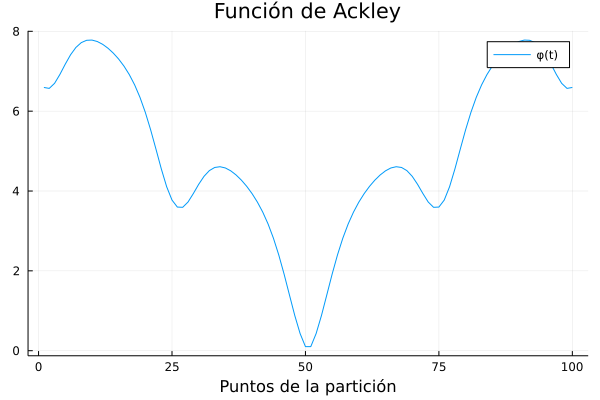

In [10]:
#Cargamos una librería para graficar: 
using Plots
#Confeccionamos el vector:
g=zeros(1,100)
x=LinRange(-2,2,100)
for j=1:100
    #g[1,j]=x[j]
    g[1,j]=phi(x[j])
end
#Ploteamos:
plot(g',title = "Función de Ackley", label = "φ(t)", xlabel= "Puntos de la partición")

In [11]:
function dphi(t)

c=2*pi;
b = 0.2;
a = 20;

    if t>0
        term1 = a*b*exp(-b*abs(t));
        else
        term1 = -a*b*exp(-b*abs(t));
    end

term2=c*exp(cos(c*t))*sin(c*t);

y = term1 + term2 ;

end

dphi (generic function with 1 method)

### Constante de Lipchitz
Con la finalidad de Calcular la constante de Lipchitz calcularemos una de manera analítica y otra implementando una función diseñada a tales fines llamada `KLip`.\
A continuación, calculamos la **Cota analítica para usar de constante de Lipchitz**:

$|\phi'(t)|=|4\cdot exp( -\frac{1}{5}|t|)\cdot\frac{t}{|t|} +2\pi\cdot sen(2\pi t)\cdot exp(cos(2\pi))|\leq 4 |exp( -\frac{1}{5}|t|)|\cdot|\frac{t}{|t|}|+ 2\pi\cdot |sen(2\pi t)|\cdot |exp(cos(2\pi))|\leq 4\cdot 1 + 2\pi\cdot 1\cdot exp(1)$

In [12]:
#Calculamos el valor numérico de esta Constante de Lipchitz y la denominamos K1
K1=4+2*pi*exp(1)

21.079468445347132

Ahora, implementamos una función para hallar una **Aproximación a la constante de Lipchitz**

In [13]:
function KLip(f,a,b,n)
    H=(b-a)/n;
    aux1=zeros(n);
    for i in 1:n
        aux = abs(f(a+i*H)-f(a+(i-1)*H));
        aux1[i]=aux/H;
    end
    max = maximum(aux1);
    return max
end
#f unimodal! 

KLip (generic function with 1 method)

In [14]:
#Para distintas potencias de 10, calculamos la correspondiente aproximación a la constante de Lipchitz
M=zeros(2,8)
for i in 1:8
    M[1,i]=i
    M[2,i]=KLip(phi,-32.768, 32.768, 10^i)
end
return M

2×8 Array{Float64,2}:
 1.0      2.0      3.0      4.0      5.0     6.0     7.0     8.0
 2.58432  7.0253  12.7708  13.0477  13.051  13.051  13.051  13.051

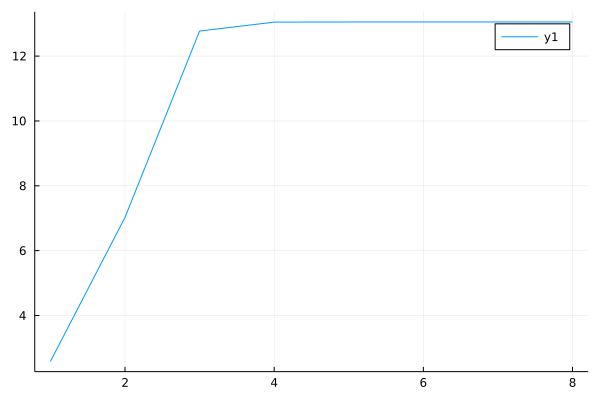

In [15]:
#Graficamos para ver su comportamiento
plot(M'[:,2])

In [16]:
#En vistas de que para n=10^5 se estanca, tomamos ese valor como K2
K2= KLip(phi,-32.768, 32.768, 10^5)

13.051018944666616

<center>
    
## Implementación y Conclusiones
Como en el artículo de referencia de la *Simon Fraser University* los valores extremos del intervalo en el cual evalúan sus métdos son $-32.768$ y $32.768$, utilizaremos los mismos a la hora de correr los algoritmos. Luego de cada resultado, escribimos una breve conlusión.

### Bracker Minimum: 

In [17]:
bracket_minimum(phi)

(-0.01, 0.01)

Puesto que arranca en $t=0$ que sabemos de antemano que es el mínimo de nuestra función objetivo, nos da un intervalo simétrico e igual al paso inicial $s$, en este caso tomado como $0.01$, como el intervalo contiene al punto $0$, el algoritmo funcionó

### Fibonacci Search

In [18]:
for i in 1:100
display((i,fibonacci_search(phi,-32.768, 32.768, i)))
end


(1, (-32.768, 32.768))

(2, (-0.3276800000000071, 32.768))

(3, (-10.922666666666665, 11.141119999999999))

(4, (-6.553600000000005, 6.553600000000005))

(5, (-0.08191999999999378, 8.191999999999993))

(6, (-2.5206153846153843, 2.5710276923076876))

(7, (-1.5603809523809544, 1.560380952380954))

(8, (-0.019275294117645066, 1.9275294117647048))

(9, (-0.5957818181818154, 0.6076974545454524))

(10, (-0.3681797752808985, 0.36817977528089973))

(11, (-1.3653333333333322, -0.9056711111111115))

(12, (-0.9872590557939888, -0.7031759656652331))

(13, (-1.1299310344827573, -0.9543571352785141))

(14, (-1.074360655737703, -0.9669245901639326))

(15, (0.9621242553191465, 1.0291874366767961))

(16, (0.9643681903569173, 1.0054051346274253))

(17, (-0.9891269349845188, -0.9635110835913306))

(18, (0.9639952164553937, 0.9796699354221476))

(19, (0.9638102941611222, 0.9735946784922382))

(20, (-0.9699280102320447, -0.9639408002923426))

(21, (0.9675912506351944, 0.9713285528767396))

(22, (0.9662197717835094, 0.96852955159298))

(23, (-0.9695845410627995, -0.9681570186335382))

(24, (0.9682993135621414, 0.969172835721422))

(25, (-0.9687902267840779, -0.9682449617358474))

(26, (0.9682690588438891, 0.9686027146188185))

(27, (-0.9686743378926449, -0.9684660651771011))

(28, (0.9683920899054643, 0.9685208095225999))

(29, (-0.968499899043314, -0.9684211335993448))

(30, (0.9684582328197361, 0.9685073993384629))

(31, (-0.9685045344806456, -0.968474448758188))

(32, (-0.9684870347599042, -0.9684682548208592))

(33, (0.9684707356116304, 0.9684822273350333))

(34, (-0.9684840636079348, -0.9684768903095263))

(35, (0.968474583318597, 0.9684790166608251))

(36, (-0.9684782044669, -0.9684754916389985))

(37, (0.9684768045451272, 0.9684784979311747))

(38, (0.9684773496297435, 0.9684783858377962))

(39, (-0.9684777946459786, -0.9684771478300648))

(40, (0.9684776167489779, 0.9684780165031973))

(41, (-0.9684776871457427, -0.9684774400840481))

(42, (-0.9684778114372876, -0.9684776587447629))

(43, (-0.9684776705273204, -0.9684775761581502))

(44, (-0.9684777237726794, -0.9684776654493248))

(45, (-0.9684776677458357, -0.9684776317000201))

(46, (-0.9684776889256157, -0.9684776666480766))

(47, (-0.968477667203703, -0.9684776534354267))

(48, (-0.9684776586507101, -0.9684776501414474))

(49, (-0.968477667020468, -0.9684776617614542))

(50, (-0.968477657387368, -0.9684776541371188))

(51, (-0.9684776590780089, -0.9684776570692442))

(52, (-0.9684776633367207, -0.968477662095236))

(53, (-0.9684776586637093, -0.9684776578964294))

(54, (-0.9684776580917014, -0.9684776576174963))

(55, (-0.9684776609217463, -0.9684776606286714))

(56, (-0.9684776564315726, -0.9684776562504425))

(57, (-0.9684776609175726, -0.9684776608056278))

(58, (-0.9684776577648759, -0.9684776576956904))

(59, (-0.9684776572333361, -0.9684776571905771))

(60, (-0.9684776572529503, -0.968477657226524))

(61, (-0.9684776632608307, -0.9684776632444981))

(62, (-0.968477657238226, -0.9684776572281321))

(63, (-0.968477657154453, -0.9684776571482148))

(64, (-0.9684776571483158, -0.9684776571444602))

(65, (-0.9684776609160813, -0.9684776609136984))

(66, (-0.9684776585888992, -0.9684776585874265))

(67, (-0.9684776576979982, -0.968477657697088))

(68, (-0.9684776632262944, -0.9684776632257316))

(69, (-0.9684776576979927, -0.9684776576976449))

(70, (-0.9684776632446759, -0.9684776632444609))

(71, (-0.9684776573582498, -0.968477657358117))

(72, (-0.9684776632446747, -0.9684776632445925))

(73, (-0.9684776632463817, -0.968477663246331))

(74, (-0.968477663244674, -0.9684776632446428))

(75, (-0.968477663244693, -0.9684776632446737))

(76, (-0.968477663246393, -0.9684776632463811))

(77, (-0.968477663244681, -0.9684776632446737))

(78, (-0.9684776632446739, -0.9684776632446692))

(79, (-0.9684776570185081, -0.9684776570185051))

(80, (-0.9684776632446738, -0.9684776632446721))

(81, (-0.9684776570185081, -0.968477657018507))

(82, (-0.9684776632463816, -0.9684776632463812))

(83, (-0.9684776632446741, -0.9684776632446737))

(84, (-0.9684776632463812, -0.9684776632463812))

(85, (-0.9684776632446739, -0.9684776632446737))

(86, (-0.9684776632463812, -0.9684776632463807))

(87, (-0.9684776632463812, -0.968477663246381))

(88, (-0.9684776632446739, -0.9684776632446737))

(89, (-0.9684776632463812, -0.9684776632463807))

(90, (-0.9684776632446739, -0.9684776632446737))

(91, (-0.9684776632463812, -0.968477663246381))

(92, (-0.9684776632446737, -0.9684776632446737))

(93, (-0.9684776632463812, -0.9684776632463806))

(94, (-0.9684776632446739, -0.9684776632446737))

(95, (-0.9684776632446739, -0.9684776632446737))

(96, (-0.9684776632463812, -0.9684776632463812))

(97, (-0.9684776632463812, -0.968477663246381))

(98, (-0.9684776632447101, -0.9684776632447101))

(99, (-0.9684776632463812, -0.9684776632463807))

(100, (-0.9684776632446739, -0.9684776632446737))

Si $n<11$, igual que lo ocurrido anteriormente, nos devuelve un intervalo que contiene al punto $t=0$ de donde concluimos que el algoritmo funciona aún teniendo una función objetivo que no es unimodal en el intervalo $[-32.768,32.768]$. Para todos los números mayores a $11$ vemos que la falta del cumplimiento de la unimodalidad afecta a nuestro resultado y así deja de funcionar el algoritmo. 

### Golden Section Search

In [19]:
for i in 1:100
display((i,golden_section_search(phi,-32.768, 32.768, i)))
end

(1, (-32.768, 32.768))

(2, (-7.7354754867131135, 32.768))

(3, (-7.7354754867131135, 17.297049026573784))

(4, (-7.7354754867131135, 7.7354754867131135))

(5, (-7.7354754867131135, 1.826098053147562))

(6, (-4.083279380417983, 1.826098053147562))

(7, (-1.8260980531475668, 1.826098053147562))

(8, (-0.4310832741228525, 1.826098053147562))

(9, (0.43108327412284675, 1.826098053147562))

(10, (0.43108327412284675, 1.2932498223685447))

(11, (0.7604015915895272, 1.2932498223685447))

(12, (0.7604015915895272, 1.089719909056208))

(13, (0.886189995743871, 1.089719909056208))

(14, (0.886189995743871, 1.011978399898215))

(15, (0.934236890740222, 1.011978399898215))

(16, (0.934236890740222, 0.9822837857365729))

(17, (0.9525891715749308, 0.9822837857365729))

(18, (0.9639315049018635, 0.9822837857365729))

(19, (0.9639315049018635, 0.9752738382287971))

(20, (0.9639315049018635, 0.9709414524096396))

(21, (0.9666090665904814, 0.9709414524096396))

(22, (0.9666090665904814, 0.9692866282790993))

(23, (0.9676318041485588, 0.9692866282790993))

(24, (0.9682638907210215, 0.9692866282790993))

(25, (0.9682638907210215, 0.9688959772934846))

(26, (0.9682638907210215, 0.9686545417066363))

(27, (0.9684131061197876, 0.9686545417066363))

(28, (0.9684131061197876, 0.9685623215185539))

(29, (0.9684131061197876, 0.96850532630787))

(30, (0.9684483310971862, 0.96850532630787))

(31, (0.9684701013304715, 0.96850532630787))

(32, (0.9684701013304715, 0.9684918715637567))

(33, (0.9684701013304715, 0.9684835560745848))

(34, (0.9684752405854129, 0.9684835560745848))

(35, (0.9684752405854129, 0.9684803798403542))

(36, (0.9684752405854129, 0.9684784168196434))

(37, (0.9684764537989328, 0.9684784168196434))

(38, (0.9684772036061237, 0.9684784168196434))

(39, (0.9684772036061237, 0.9684779534133144))

(40, (0.9684774900069856, 0.9684779534133144))

(41, (0.9684774900069856, 0.9684777764078474))

(42, (0.9684775994023804, 0.9684777764078474))

(43, (0.9684775994023804, 0.9684777087977752))

(44, (0.968477641187703, 0.9684777087977752))

(45, (0.968477641187703, 0.9684776829730256))

(46, (0.968477641187703, 0.9684776670124526))

(47, (0.9684776510518796, 0.9684776670124526))

(48, (0.9684776510518796, 0.9684776609160562))

(49, (0.9684776548196598, 0.9684776609160562))

(50, (0.9684776548196598, 0.96847765858744))

(51, (0.9684776562588238, 0.96847765858744))

(52, (0.9684776562588238, 0.9684776576979877))

(53, (0.9684776568085354, 0.9684776576979877))

(54, (0.968477657148276, 0.9684776576979877))

(55, (0.968477657148276, 0.9684776574880165))

(56, (0.9684776572780454, 0.9684776574880165))

(57, (0.9684776572780454, 0.9684776574078147))

(58, (0.9684776573276128, 0.9684776574078147))

(59, (0.9684776573276128, 0.9684776573771803))

(60, (0.9684776573465459, 0.9684776573771803))

(61, (0.9684776573465459, 0.968477657365479))

(62, (0.9684776573537777, 0.968477657365479))

(63, (0.9684776573537777, 0.9684776573610094))

(64, (0.9684776573565399, 0.9684776573610094))

(65, (0.9684776573565399, 0.9684776573593021))

(66, (0.968477657357595, 0.9684776573593021))

(67, (0.968477657357595, 0.96847765735865))

(68, (0.968477657357998, 0.96847765735865))

(69, (0.968477657357998, 0.968477657358401))

(70, (0.9684776573581519, 0.968477657358401))

(71, (0.9684776573581519, 0.9684776573583058))

(72, (0.9684776573582107, 0.9684776573583058))

(73, (0.9684776573582107, 0.9684776573582694))

(74, (0.9684776573582331, 0.9684776573582694))

(75, (0.9684776573582331, 0.9684776573582555))

(76, (0.9684776573582417, 0.9684776573582555))

(77, (0.9684776573582417, 0.9684776573582503))

(78, (0.968477657358245, 0.9684776573582503))

(79, (0.968477657358245, 0.9684776573582483))

(80, (0.9684776573582462, 0.9684776573582483))

(81, (0.9684776573582462, 0.9684776573582475))

(82, (0.9684776573582468, 0.9684776573582475))

(83, (0.9684776573582468, 0.9684776573582472))

(84, (0.968477657358247, 0.9684776573582472))

(85, (0.968477657358247, 0.9684776573582472))

(86, (0.968477657358247, 0.9684776573582472))

(87, (0.968477657358247, 0.9684776573582472))

(88, (0.968477657358247, 0.9684776573582472))

(89, (0.968477657358247, 0.9684776573582472))

(90, (0.968477657358247, 0.9684776573582472))

(91, (0.968477657358247, 0.9684776573582472))

(92, (0.968477657358247, 0.9684776573582472))

(93, (0.968477657358247, 0.9684776573582472))

(94, (0.968477657358247, 0.9684776573582472))

(95, (0.968477657358247, 0.9684776573582472))

(96, (0.968477657358247, 0.9684776573582472))

(97, (0.968477657358247, 0.9684776573582472))

(98, (0.968477657358247, 0.9684776573582472))

(99, (0.968477657358247, 0.9684776573582472))

(100, (0.968477657358247, 0.9684776573582472))

Durante la ejecución de este algoritmo, observamos que si la cantidad de iteraciones en el ciclo `for`supera a las 8 (es decir, $n>8$), el intervalo devuelto por `golden_section_search` no contiene al punto mínimo $t=0$ y devuelve intervalos de longitudes pequeñas a partir de $n=20$. Al igual que lo ocurrido con `fibonacci_search`el incumplimiento de la hipótesis de *unimodalidad* por parte de nuestra función objetivo se ve reflejado en el mal funcionamiento del algoritmo para valores de n considereblemente bajos. 

### Quadractic fit Search

In [20]:
quadratic_fit_search(phi,-32.768, 0, 32.768, 100)

(-32.768, 0, 32.768)

Este algortimo funciona, pues devuelve, tomando como punto central al cero, una función cuadrática de la forma $ax^2-a$ (en este caso particular, $a=32.768$) cuya derivada es $2ax$ que se anula en cero, por tener segunda derivada $2a$ con $a>0$, obtenemos que la función tiene un mínimo en $0$ como queríamos.

### Shubert-Piyavskii

In [21]:
#Primero lo corremos con K1 obtenido analíticamente
shubert_piyavskii(phi, -32.768, 32.768, K1, 10^-2, 0.01)

(Ppt(0.0, 4.440892098500626e-16), Any[(-0.011183991172738834, 0.011183991172738831)])

In [22]:
#Implementamos, ahora, con K2 obtenido vía el algoritmo Klip
shubert_piyavskii(phi, -32.768, 32.768, K2, 10^-2, 0.01)

(Ppt(0.0, 4.440892098500626e-16), Any[(-0.0009111238942008074, 0.002648202421555829)])

Claramente, este algoritmo funciono puesto que el punto sugerido en ambas celdas es cero y el valor de la función en tal punto es un *cero de máquina*, además, el mínimo está contenido en los intervalos de incertidumbre obtenidos. Además, cuando el algoritmo se implementó con la constante de Lipchitz obtenida con la función `KLip`, el intervalo de incertidumbre tuvo menor medida, es decir, fue más preciso el algoritmo. 

### Bisección

In [23]:
for i in 1:10
display((i,bisection(dphi, -32.768, 32.768, 1/(10^i))))
end

(1, (-20.543999999999997, -20.48))

(2, (-20.512, -20.504))

(3, (-20.505000000000003, -20.5045))

(4, (-20.5045625, -20.5045))

(5, (-20.5045625, -20.504554687499997))

(6, (-20.504559570312498, -20.504558593749998))

(7, (-20.50455908203125, -20.504559020996094))

(8, (-20.504559036254882, -20.504559028625486))

(9, (-20.504559032440184, -20.504559031486508))

(10, (-20.504559031546112, -20.504559031486508))

En este caso, se supone que el mínimo tiene que estar estrictamente contenido en el intervalo que da como resultado, pero como vemos en cada iteración, para un error menor a $10^{-i}$, el intervalo tiene su extremo izquierdo en cero, donde yace el mínimo de nuestra función objetivo. Esto es una clara consecuencia de que la misma no es derivable en $t=0$ pues:\
$$\lim_{t\rightarrow 0^-} \phi'(t)=-4,$$ y\
$$\lim_{t\rightarrow 0^+} \phi'(t)=4$$.\
De ahí que el método falla.

### Bracket Sign Change

In [24]:
bracket_sign_change(dphi, -32.768, 32.768; k=3)

(-32.768, 32.768)

Finalmente, en la implementación de `bracket_sign_change`vemos que no se modifica nuestro intervalo original, pues al ser la derivada una función impar, no necesita hacer modificaciones al intervalo inicial

## Fuentes: 
- Kochenderfer, Mykel J.,Wheeler, Tim A.(2019) *Algorithms for Optimization* (1st Edition).Cambridge, MA : The MIT Press
- https://www.sfu.ca/~ssurjano/ackley.html 
- https://www.famaf.proed.unc.edu.ar/pluginfile.php/70941/mod_resource/content/1/Fibonacci.pdf 
